В нашем проекте мы будем решать 1-мерное уравнение Шредингера для частицы в квантовой яме с бесконечными стенками. Мы будем реализовывать такие методы, как решение дифференциальных уравнений с использованием

1)метода Рунге-Кутты четвертого порядка путем определения функции и использования

2)метода Ньютона

3)метода секущих для повторения значений для получения корня функции, а также решения для граничных условий

Затем, используем данные методы чтобы решить уравнение Шредингера для различных потенциалов в квантовой яме с бесконечными стенками и получаем новые значения собственной энергии, соответствующие каждому потенциалу.

1-й потенциал: потенциал квантовой ямы, 2-й потенциал: гармонический потенциал в квантовой яме, 3-й потенциал: потенциал конечной квантовой ямы, 4-й потенциал: ангармонический потенциал в квантовой яме

### Численное решение квантово-механической задачи о частице в потенциальной яме с непроницаемыми стенками.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image # для загрузки фотографий
%matplotlib inline

1-мерное уравнение Шредингера $(eq1)$: $$
\frac{-\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x)
$$
Где потенциал квантовой ямы:
$$ V_x = \begin{cases} 0 & \text{if } -a < x < +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} 
$$

In [2]:
#Табличные значения
m=9.1094e-31 #масса электрона
hbar=1.05446e-34 #приведённая постоянная планка
echarge=1.6022e-19 #заряд электрона
a=5e-11 #полуширина квантовой ямы

#параметры для Рунге-Кутты
N=1000 #количество точек
h=2*a/N #шаг
xpoints = np.arange(-a, a, h) #массив точек с шагом h

### Нахождение энергии основного состояния:

In [3]:
def V(x):
    """Потенциальная функция для уравнения Шредингера для квантовой ямы
    Inputs: (x) положение частицы
    Output: (V) потенциал в этой точке"""
    return 0.0 #потенциал везде 0

Мы можем привести $(eq 1)$ к виду $(2)$:
$$
\frac{d \psi}{dx } = \phi, \\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x),
$$
Ниже реализована функция, которая находит производные $\psi$ и $\phi$ со значением энергии $E$ в точке $x$:

In [4]:
def f(r,x,E): 
    '''
    Inputs: (r) массив, содержащий значения psi и phi 
            (x) рассматрвиаемые точки 
            (E) значения энергий
    Outputs: Вектор из двух элементов, содержащий производные psi and phi'''
    psi = r[0] # first element of r represents psi 
    phi = r[1] # second element of r represents phi
    fpsi = phi # dpsi/dx=phi
    fphi = (2*m*(V(x)-E)*psi)/hbar**2 
    
    return np.array([fpsi,fphi],float) #вернем вектор float

Оба дифференциальных уравнения $\frac{d \psi}{dx }$ и $\frac{d \phi}{dx }$ могут быть решены методом Рунге-Кутты.

Ниже определена функция, которая будет использовать $(x, E)$ и вычислять $f(x, E)$ (определена выше). Заметим, что:
- r=r[psi,phi] - вектор
- Нам неинтересны значения $\phi$, так что мы не будем их где-либо сохранять для вывода
- Ниже приведены формулы для 4 порядка точности (соотвественно eq 4, 5, 6, 7, 8)
$$
k_1 = h f(x,t), \\
k_2 = h f(x+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 = h f(x+\frac{1}{2}k_2, t+\frac{1}{2}h), \\
k_4 = h f(x+k_3, t+h), \\
x(t+h) = x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
$$

In [5]:
#Определим функцию Рунге-Кутты для решения дифференциального уравнения 1 порядка.
def RungeKutta2d(x, E):
    '''
    Inputs:(x) массив точки
           (E) массив значений энергий
    Outputs: [psipoints, phipoints]: решения psi(x) и phi(x); 
            numpy массив того же размера, что xpoints'''   
    phi = 1.0 #начальное условие
    r=np.array([0,phi]) #граничные условия; psi =0 phi = 1.0; массив из двух компонент
    psipoints = [] 
    
    for i in x:
        psipoints.append(r[0])
        k1 = h*f(r,i,E) 
        k2 = h*f(r+0.5*k1, i+0.5*h,E)
        k3 = h*f(r+0.5*k2, i+0.5*h,E)
        k4 = h*f(r+k3, i+h,E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    psipoints.append(r[0]) #добавляем r->psipoints
    return np.array([psipoints]) # сделаем numpy массив с 2 строками и N столбцами (массив пар)

Мы вычислили значения $\psi$ в точках. Далее найдем энергию n-го возбужденного состояния, для чего применим методом секущих. Установим граниченые условия волновой функции как равной нулю на границе (в точках $x = a$ и $x = -a$)
Формула секущих: (eq9)
$$ 
x_3 = x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)},
$$
 
Ниже преведена реализация:

In [6]:
def energy_gen(x,n,g1,g2):
    """ Функция находит энергию n-го возбужденного состояния
    inputs: (x) массив точек
            (n) состоение
            (g1), (g2) предположения для энергии основного состояния (n = 1) в Джоулях
    output: значение энергии n-го вобужденного состояния."""
    
    E1 = g1*(n**2)
    E2 = g2*(n**2)
    
    tol = echarge/1000.0 #точность
    err = 1 #ошибка
    itt = 0 

    while err > tol:
        wavefunc1 = RungeKutta2d(x,E1)[0,N] #Решаем для предположения, используя метод Рунге-Кутты
        wavefunc2 = RungeKutta2d(x,E2)[0,N]
        E3 = E2 - wavefunc2*(E2-E1)/(wavefunc2-wavefunc1) #применяем формулу секущих
        err = abs(E2-E1)
        # обновляем данные для формулы
        E1 = E2
        E2 = E3
        itt+=1
    print("For excited state n={} : energy= {:.12} Joules taking {} iterations of the secant method".format(n, E2,itt))
    return E3 

### Нахождение волновой функции основного состояния

Теоретическое значение энергии возбужденного состояния в нашей моделе задано уравнением (eq10):
$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$
Используя $n = 1$ в данном формуле, найдем теоретическое значение энергии основного состояния.

In [7]:
n=1.0
E_gr=(np.pi*hbar*n)**2/((2*m)*(2*a)**2) 
print ("The theoretical ground state energy: {} Joules".format(E_gr))

The theoretical ground state energy: 6.023379086023515e-18 Joules


Сравним теоретическое значение и рассчетное значения:

In [8]:
g1inf=6.02e-18
g2inf=6.03e-18
energy1=energy_gen(xpoints,1.0,g1inf,g2inf)

For excited state n=1.0 : energy= 6.02337908603e-18 Joules taking 3 iterations of the secant method


Выше можем видеть, что теоретическое значение энергии основного состояния (eq 10) приблизительно равно рассчитанному нами. Значение энергии получилось неравным теоретическому, потому что нами в цикле было установлено ограничение на точность. Повышение точности большим количеством итераций невыгодно из-за времени выполнения программы (для большого количество итераций можно было сделать точность в последнем знаке после запятой, но нам этого не требуется)  
Далее построим график для данной волновой функции (ненормированный)

Text(0.5, 1.0, 'Ground State Wavefunction of a particle\n')

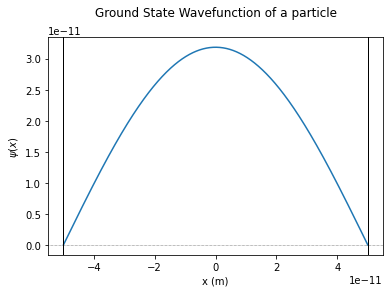

In [9]:
xplotpoints = np.arange(-a, a+h, h)

bestsoln = RungeKutta2d(xpoints, energy1) 

plt.plot(xplotpoints,bestsoln[0])
plt.xlabel('x (m)')
plt.ylabel('$\psi(x)$')
#черная вертикальная линия изображает границы ямы
plt.axvline(x=-a,c='k',ls='-',lw=1.0) 
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.axhline(c="k",ls=":", lw=0.5) 
plt.title('Ground State Wavefunction of a particle\n')

Функция выше не является нормированной. Условие нормировки (eq 11):
$$
\int | \psi(x) |^2 {\rm d} x = 1
$$
Вычислим интеграл методом трапеций, где для расчета берется формула: (eq12)
$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right]
$$


In [10]:
def trap(integrand):
    """
    input: (integrand) функция, которую необходимо проинтегрировать
    output: значение"""
    
    integral=0.0 
    for i in range(0,len(integrand)-1):
        area_1=0.5*h*(integrand[i]+integrand[i+1]) #расчет площади
        integral=integral+area_1 
    return integral 

In [11]:
norm_constgr = trap((bestsoln[0])**2) #находим интеграл нашей функции
print ("The area under the curve is {}".format(norm_constgr))

The area under the curve is 5.06605918210863e-32


Далее изобразим уже нормированную функцию:

Text(0.5, 1.0, 'Normalised ground state wavefunction of a particle')

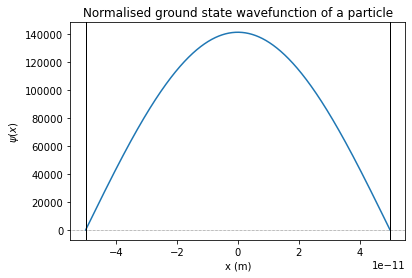

In [12]:

norm_wfgr = bestsoln[0]/(np.sqrt(norm_constgr)) #нормализуем
plt.plot(xplotpoints,norm_wfgr)
plt.xlabel('x (m)')
plt.ylabel('$\psi(x)$')

plt.axvline(x=-a,c='k',ls='-',lw=1.0) 
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.axhline(c="k",ls=":", lw=0.5) 
plt.title('Normalised ground state wavefunction of a particle')

Проверим, что интеграл под нашей нормированной функцией равен 1

In [13]:
checknorm_wf=trap(norm_wfgr**2) 
print("The area under the curve is {:.5}".format(checknorm_wf))

The area under the curve is 1.0


Далее сравним вычисленные нормированные волновые функции с их теоретическим выражением(для основного состояния):
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{нечетно}
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{четно}.
$$

In [14]:
def theonormwf(x,n):
    """
    Inputs: (x) массив точек
            (n) номер состояния
    Output: теоретическое значение нормированной функции"""
    if n%2==0: 
        theo_wf=(1/np.sqrt(a))*np.sin(n*np.pi*x/(2.0*a) + np.pi*((n//2)%2))  
    else: 
        theo_wf=(1/np.sqrt(a))*np.cos(n*np.pi*x/(2.0*a) + np.pi*((n//2)%2))
    return theo_wf 

Нарисуем два графика, чтобы сравнить их:

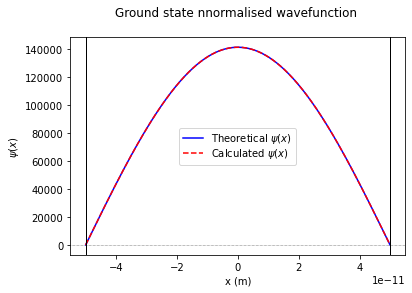

In [15]:
theo_wfgr=theonormwf(xplotpoints,1.0)

plt.plot(xplotpoints, theo_wfgr, 'b', label='Theoretical $\psi(x)$')
plt.plot(xplotpoints, norm_wfgr,'r--' , label='Calculated $\psi(x)$')
plt.title('Ground state nnormalised wavefunction \n')
plt.xlabel('x (m)')
plt.ylabel('$\psi(x)$')

plt.axvline(x=-a,c='k',ls='-',lw=1.0) 
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.axhline(c="k",ls=":", lw=0.5) 
plt.legend(labelspacing=0.1, loc='best')

Выше приведены графики для нормированных волновых функций Заметим, что они имеют вид $Asin(nx) + Bcos(nx)$, посколько это решение уравнения Шредингера. Кроме того, функция за пределами ямы и на краю равна нулю, что соответсвует тому, что далее границ ямы, частица не может оказаться.

### Нахождение возбужденных состояний:

Определим функцию, которая позволит вычислить и построить волновые функции для возбужденных состояний с энергией $1...n$, а так же для рассчета площади под кривой и энергии каждого возбужденного состояния.

In [43]:
def higherstate_wf(xpoints,xplotpoints,n_input,g1,g2):
    """Функция для вычисления и построения волновых функций для возбужденных
        состояний для потенциальной ямы (для каждого n до n_input).
    Inputs: (xpoints)
            (xplotpoints)
            (n_input) самое больше возбужденное состояние 
            (g1), (g2) предположение для секущих
    Output: Сравнение рассчетных и теоретических значений энергии для всех состояний
            между 1 и n_input; график построенных волновых функций"""
    n=1 
    #цикл для вычисления энергии n-го состояния и построения волновой функции
    while n<n_input+1:
        energy_n=energy_gen(xpoints,n,g1,g2) #энергия n-го состояния
        bestsoln_n = RungeKutta2d(xpoints, energy_n) #решаем дифференциальное уравнение
        print ("and in eV is {}". format(energy_n/echarge))
        norm_wf_n = bestsoln_n[0]/np.sqrt(trap((bestsoln_n[0])**2)) #нормализуем функцию
        print ("The area under is {:.5}".format(trap(norm_wf_n**2)))
        graph = plt.plot(xplotpoints, norm_wf_n, label="Calculated $\psi(x)$ n={}".format(n)) 
        n=n+1 

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.1)
    plt.xlabel('x (m)') 
    plt.ylabel('$\psi(x)$')
    plt.axhline(c="k",ls=":", lw=0.5) 
    return graph
plt.show()

Рассчитаем теоретическое значение энергии, заданное уравнением $(10)$ чтобы сравнить его с рассчетным.

In [17]:
def theoen(n_input):
    """Теоретическое значение энергии для n состояниий в бесконечной потенциальной яме
    Input: (n_input)
    Output: Теоретические значения энергий для n=1...n_input"""
    n=1 
    while n<n_input+1:
        E_theo = (np.pi*hbar*n)**2/((2*m)*(2*a)**2) # Теоретическая формула для рассчета энергии n-го состояния
        if n==1: 
            print ("For ground state n = {},Theoretical energy in Joules: {:.5} and in eV: {:.5}".format(n, E_theo, E_theo/echarge))
        else:
            print ("For excited state n = {},Theoretical energy in Joules: {:.5} and in eV: {:.5}".format(n, E_theo, E_theo/echarge))
        n=n+1
    return E_theo 

In [18]:
theoen4=theoen(4.0) # Пример работы для n = 4

For ground state n = 1,Theoretical energy in Joules: 6.0234e-18 and in eV: 37.594
For excited state n = 2,Theoretical energy in Joules: 2.4094e-17 and in eV: 150.38
For excited state n = 3,Theoretical energy in Joules: 5.421e-17 and in eV: 338.35
For excited state n = 4,Theoretical energy in Joules: 9.6374e-17 and in eV: 601.51


For excited state n=1 : energy= 6.02337908603e-18 Joules taking 3 iterations of the secant method
and in eV is 37.59442695065094
The area under is 1.0
For excited state n=2 : energy= 2.40935163447e-17 Joules taking 3 iterations of the secant method
and in eV is 150.37770780626582
The area under is 1.0
For excited state n=3 : energy= 5.42104117813e-17 Joules taking 3 iterations of the secant method
and in eV is 338.34984259980166
The area under is 1.0
For excited state n=4 : energy= 9.63740654164e-17 Joules taking 3 iterations of the secant method
and in eV is 601.5108314594197
The area under is 1.0


Text(0.5, 1.0, 'Normalised Wavefunctions \n')

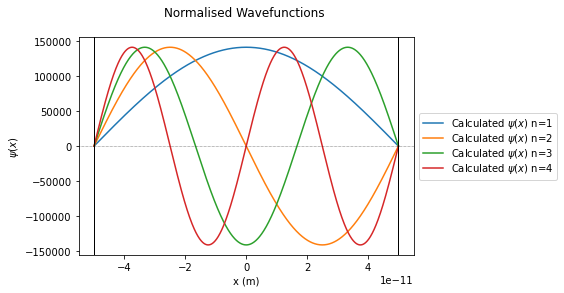

In [19]:
#Далее найдем рассчетные значения энергий методом секущих
g1in=6.02e-18 #начальное приближение для метода секущих - ground state 
g2in=6.03e-18
st4_normwf=higherstate_wf(xpoints,xplotpoints,4.0,g1in,g2in) #ищем волновую функцию
plt.axvline(x=-a,c='k',ls='-',lw=1.0)
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.title('Normalised Wavefunctions \n')

Выше приведен график для нормализованных волновых функций для $n = 1...4$ возбужденных состояний в бесконечной квадратной потенциальной яме. Заметим, что они являются непрерывными, которые совпадают на границе и имеют одинаковое количество максимумов, а также, чем больше состояние $n$, тем короче длина волны $\Rightarrow$ больше энергия. Кроме того, графики правильно описывают то, что частица находится в квадратной потенциальной яме (вне ямы полновая функция отсутсвует).

Однако стоит заметить, что теоретическое и рассчетные значения энергий правильно совпадают при не самых больших значениях $n$, по мере того как $n \longrightarrow \infty$? то энергия для таких состояний уже не будет совпадать с теоретическим. Это означает, что метод секущих не дает достаточную точность, что может быть результатом количества итераций в цикле или неточностью начальных предположений.

Теперь рассчитаем и построим нормализованные функции плотности вероятности для каждого из возбужденных состояний:

In [20]:
def higherstate_prob(xpoints,xplotpoints,n_input,g1,g2):
    """Вычисление и построение функции плотности для n=1...n_input.
    Inputs: (xpoints)
            (xplotpoints)
            (n_input) наибольшее n, для которого вычисляем функцию плотности
            (g1), (g2) предположения для метода секущих
    Output: Сравнение расчетных и теоретических значений, график волновых функций"""
    n=1 
    while n<n_input+1:
        energy_n=energy_gen(xpoints,n,g1,g2) #ищем энергию n-го состояния
        bestsoln_n = RungeKutta2d(xpoints, energy_n) #ищем волновую функцию методом Рунге-Кутта
        norm_prob_n = (bestsoln_n[0]/np.sqrt(trap((bestsoln_n[0])**2)))**2 #Ищем константы для нормировки
        graph2 = plt.plot(xplotpoints, norm_prob_n, label="Calculated $\psi^2(x)$ n={}".format(n))
        check_integral=trap(norm_prob_n)
        print("Area of integral of state n= {} is: {}".format(n, check_integral))
        n=n+1 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.1)
    plt.xlabel('x (m)')
    plt.ylabel('$\psi^2$ (x)')
    plt.axhline(c="k",ls=":", lw=0.5) 
    return graph2 
plt.show() 

For excited state n=1 : energy= 6.02337908603e-18 Joules taking 3 iterations of the secant method
Area of integral of state n= 1 is: 1.0000000000000004
For excited state n=2 : energy= 2.40935163447e-17 Joules taking 3 iterations of the secant method
Area of integral of state n= 2 is: 1.000000000000001
For excited state n=3 : energy= 5.42104117813e-17 Joules taking 3 iterations of the secant method
Area of integral of state n= 3 is: 1.0000000000000016
For excited state n=4 : energy= 9.63740654164e-17 Joules taking 3 iterations of the secant method
Area of integral of state n= 4 is: 1.0000000000000009


Text(0.5, 1.0, 'Normalised probability density functions\n')

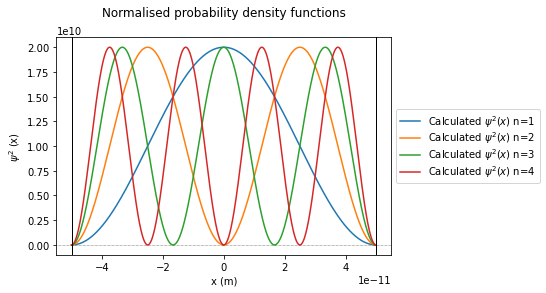

In [21]:
#Найдем плотность вероятности для n = 4 состояний
st4_normprob=higherstate_prob(xpoints,xplotpoints,4.0,g1in,g2in)
plt.axvline(x=-a,c='k',ls='-',lw=1.0)
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.title('Normalised probability density functions\n')

Выше приведены графики для нормированных функций плотности вероятности для первых четырех состояний в яме. Заметим, что данные графики выше $y = 0$, что соответствует их смыслу, а также они имеют вид $Asin^2(nx) + Bcos^2(nx)$, посколько это решение уравнения Шредингера для плотности вроятности. Кроме того, функция за пределами ямы и на краю равна нулю, что соответсвует тому, что далее границ ямы, частица не может оказаться.

Далее сравним вычисленные волновые функции с известными из уравнений $(13), (14)$. Построим их графики.


For excited state n=1 : energy= 6.02337908603e-18 Joules taking 3 iterations of the secant method
and in eV is 37.59442695065094
The area under is 1.0
For excited state n=2 : energy= 2.40935163447e-17 Joules taking 3 iterations of the secant method
and in eV is 150.37770780626582
The area under is 1.0
For excited state n=3 : energy= 5.42104117813e-17 Joules taking 3 iterations of the secant method
and in eV is 338.34984259980166
The area under is 1.0
For excited state n=4 : energy= 9.63740654164e-17 Joules taking 3 iterations of the secant method
and in eV is 601.5108314594197
The area under is 1.0


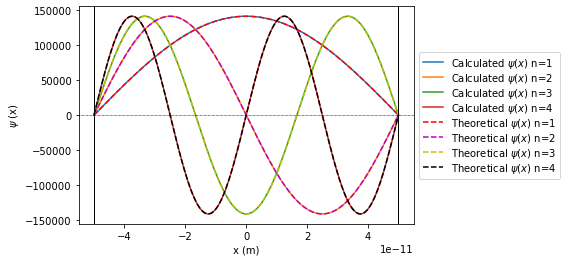

In [22]:
#найдем теоретические нормированные волновые функции (воспользуемся theonormwf)
theo_wf=theonormwf(xplotpoints,1.0)
theo_wf2=theonormwf(xplotpoints,2.0)
theo_wf3=theonormwf(xplotpoints,3.0)
theo_wf4=theonormwf(xplotpoints,4.0)

#рассчитанные норм. волновые функции (уже являются графиками)
st4_normwf=higherstate_wf(xpoints,xplotpoints,4.0,g1in,g2in)

plt.plot(xplotpoints, theo_wf, 'r--', label='Theoretical $\psi(x)$ n=1')
plt.plot(xplotpoints, theo_wf2, 'm--', label='Theoretical $\psi(x)$ n=2')
plt.plot(xplotpoints, theo_wf3, 'y--', label='Theoretical $\psi(x)$ n=3')
plt.plot(xplotpoints, theo_wf4, 'k--', label='Theoretical $\psi(x)$ n=4')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.1)
plt.xlabel('x (m)')
plt.ylabel('$\psi$ (x)')

plt.axvline(x=-a,c='k',ls='-',lw=1.0)
plt.axvline(x=a,c='k',ls='-',lw=1.0) 
plt.axhline(c="k",ls=":", lw=0.5)

Теперь аналогично построи графики для нормализированных функций плотности вероятности для сравнения рассчетных значений и теоретических:

For excited state n=1 : energy= 6.02337908603e-18 Joules taking 3 iterations of the secant method
Area of integral of state n= 1 is: 1.0000000000000004
For excited state n=2 : energy= 2.40935163447e-17 Joules taking 3 iterations of the secant method
Area of integral of state n= 2 is: 1.000000000000001
For excited state n=3 : energy= 5.42104117813e-17 Joules taking 3 iterations of the secant method
Area of integral of state n= 3 is: 1.0000000000000016
For excited state n=4 : energy= 9.63740654164e-17 Joules taking 3 iterations of the secant method
Area of integral of state n= 4 is: 1.0000000000000009


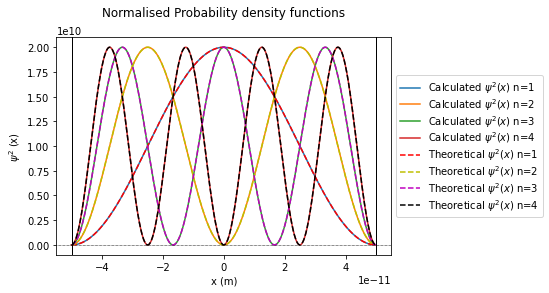

In [23]:
st4_normprob=higherstate_prob(xpoints,xplotpoints,4.0,g1in,g2in)

plt.plot(xplotpoints, theo_wf**2, 'r--', label='Theoretical $\psi^2(x)$ n=1')
plt.plot(xplotpoints, theo_wf2**2, 'y--', label='Theoretical $\psi^2(x)$ n=2')
plt.plot(xplotpoints, theo_wf3**2, 'm--', label='Theoretical $\psi^2(x)$ n=3')
plt.plot(xplotpoints, theo_wf4**2, 'k--', label='Theoretical $\psi^2(x)$ n=4')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.1)
plt.xlabel('x (m)')
plt.ylabel('$\psi^2$ (x)')
plt.title('Normalised Probability density functions\n')
plt.axvline(x=-a,c='k',ls='-',lw=1.0) 
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.axhline(c="k",ls=":", lw=0.5) 

Здесь мы можем видеть, что теоретические функции плотности вероятности достаточно совпадают для $n = 1...4$ с рассчитанными методом секущих и Рунге-Кутты.
Отметим, что сами волновые функции не имеют физической интерпретации, в отличие от функции плотности вероятности, которая указывает на вероятност и нахождении частица в определенной области. Поскольку же они совпадают, то и волновые функции тоже совпадают.

В частности, вычисленные волновые функции и функции плотности вероятности согласуются с известным результатми, которые показаны на картинке ниже.
Отсюда мы можем сделать вывод, что наши расчеты согласуются с теорией для уравнения Шредингера в квадратной потенциальной яме с бесконечными стенками.

In [24]:
Image(url='http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/imgqua/pbox1.gif')

Теперь мы рассмотрим, что происходит, когда n приближается к гораздо более высокому возбужденному состоянию. Т.е. рассмотрим n=20

Theoretical value: 2.409351634409406e-15 in Joules and: 15037.770780235962 in eV
For excited state n=20.0 : energy= 2.40935225938e-15 Joules taking 4 iterations of the secant method


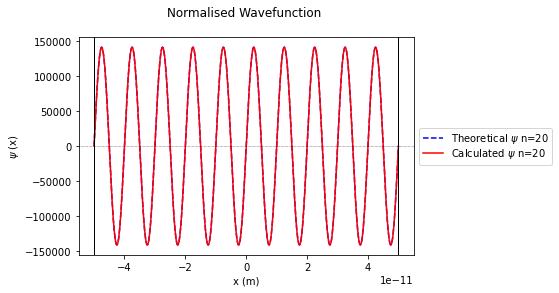

In [25]:
n=20.0
E_20=(np.pi*hbar*n)**2/((2*m)*(2*a)**2)
print("Theoretical value: {} in Joules and: {} in eV".format(E_20, E_20/echarge))

#Ищем нормализованную волновую функцию для n=20
energy20 = energy_gen(xpoints, 20.0, 6.02e-18, 6.03e-18)
bestsoln20 = RungeKutta2d(xpoints, energy20)
norm_wf20 = bestsoln20[0]/np.sqrt(trap((bestsoln20[0])**2)) #расчет волновой функции
theo_wf20=theonormwf(xplotpoints,20.0) #теоритическая волновая фунцкция

plt.plot(xplotpoints, theo_wf20, 'b--', label='Theoretical $\psi$ n=20') 
plt.plot(xplotpoints, norm_wf20, 'r-', label='Calculated $\psi$ n=20') 


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.1) 
plt.xlabel('x (m)')
plt.ylabel('$\psi$ (x)')
plt.title('Normalised Wavefunction \n')
plt.axvline(x=-a,c='k',ls='-',lw=1.0)
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.axhline(c="k",ls=":", lw=0.5) 

Здесь мы видим, что с увеличением n разница между расчетными и известными (теоретическими) значениями энергии увеличивается. Это может быть связано с нашим методом расчета энергии с использованием секущей формулы и с пределом, установленным допуском. Следовательно, по мере увеличения n метод секущей не может точно сходиться к корню, следовательно, энергия, полученная с помощью метода секущей, уменьшается с точностью, поскольку она не соответствует высокоточным значениям теоретической энергии, полученной для данного n состояния. Однако рассчитанные значения волновых функций являются правильными, поскольку они совпадают с известными волновыми функциями.

### Бесконечный квадратная яма

Мы собираемся сохранить бесконечные квадратные стенки потенциальной ямы, которые гарантируют, что частица не может быть найдена в области $V(x) = \infty$. Это означает, что мы можем сохранить граничные условия исходной задачи. Однако мы собираемся изменить основание потенциальной ямы так, чтобы она больше не была квадратной, по сути, мы собираемся встроить другой потенциал в квадратную яму. Это открывает возможность решения для широкого спектра систем, для которых не существует простого аналитического решения.

### Гармонический Потенциал

Используем для рассчетов потенциала внутри ямы формулой (eq 15):
$$
V(x) = V_0 \frac{x^2}{a^2}
$$
    

In [26]:
Vo = 800*echarge #определим значение начального потенцала

In [27]:
def V(x):
    """Потенциальная функция для уравнения Шредингера в виде гармонического потенциала
    Inputs: (x) положение частицы
    Output: (V_x) Потенциал на этой позиции"""
    return Vo*(x/a)**2 #возвращает значение потенциала согласно eq15

Зададим начальные предположения об энергии гармонического потенциала:

In [28]:
g1har=0.9e-17 
g2har=1.1e-17

For excited state n=1 : energy= 1.77595064867e-17 Joules taking 8 iterations of the secant method
and in eV is 110.8445043482836
The area under is 1.0
For excited state n=2 : energy= 5.3923999159e-17 Joules taking 7 iterations of the secant method
and in eV is 336.56222168892117
The area under is 1.0
For excited state n=3 : energy= 9.29890525381e-17 Joules taking 6 iterations of the secant method
and in eV is 580.3835509808166
The area under is 1.0
For excited state n=4 : energy= 1.3852118674e-16 Joules taking 9 iterations of the secant method
and in eV is 864.5686352526138
The area under is 1.0


Text(0.5, 1.0, 'Normalised wavefunction\n')

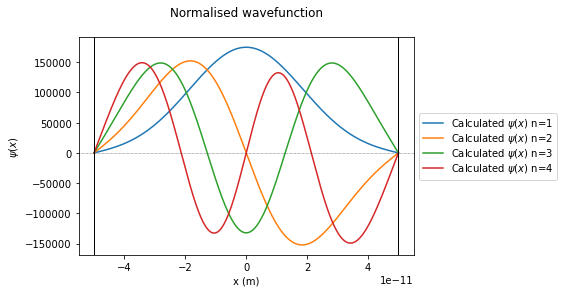

In [29]:
#построим график нормированных волновых функций более высокого энергетического состояния для гармонического потенциала
normwf_har=higherstate_wf(xpoints,xplotpoints,4.0, g1har, g2har)
plt.axvline(x=-a,c='k',ls='-',lw=1.0)
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.title('Normalised wavefunction\n')

For excited state n=1 : energy= 1.77595064867e-17 Joules taking 8 iterations of the secant method
Area of integral of state n= 1 is: 1.0000000000000016
For excited state n=2 : energy= 5.3923999159e-17 Joules taking 7 iterations of the secant method
Area of integral of state n= 2 is: 1.0000000000000007
For excited state n=3 : energy= 9.29890525381e-17 Joules taking 6 iterations of the secant method
Area of integral of state n= 3 is: 1.0000000000000004
For excited state n=4 : energy= 1.3852118674e-16 Joules taking 9 iterations of the secant method
Area of integral of state n= 4 is: 1.0000000000000004


Text(0.5, 1.0, 'Normalised probability density of wavefunctions')

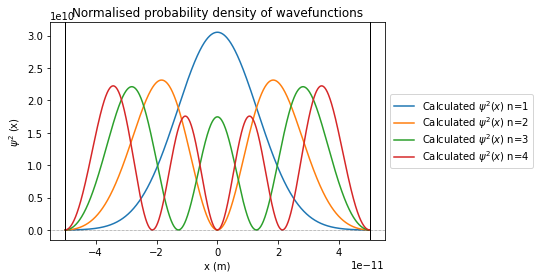

In [30]:
#построим графики плотности вероятности для гармонического потенциала
normprob_har=higherstate_prob(xpoints,xplotpoints,4.0, g1har, g2har)
plt.axvline(x=-a,c='k',ls='-',lw=1.0) #
plt.axvline(x=a,c='k',ls='-',lw=1.0)
plt.title('Normalised probability density of wavefunctions')

Как было отмечено в прошлой секции для ямы, данные функции плотностей удовлеворяют всем свойствам функций плотностей вероятности.

Вычисленные волновые функции и функции плотности вероятности также согласуются с известными результатами, показанными на изображении ниже

In [31]:
Image(url='http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/imgqua/hoscom2.gif')

 Ниже на графике для гармонической потенциальной ямы язобразим энергии возбужденных состояний для $n = 1 ... 4$ уровней:

For excited state n=1.0 : energy= 1.77595064867e-17 Joules taking 8 iterations of the secant method
For excited state n=2.0 : energy= 5.3923999159e-17 Joules taking 7 iterations of the secant method
For excited state n=3.0 : energy= 9.29890525381e-17 Joules taking 6 iterations of the secant method
For excited state n=4.0 : energy= 1.3852118674e-16 Joules taking 9 iterations of the secant method


Text(0.5, 0, 'x')

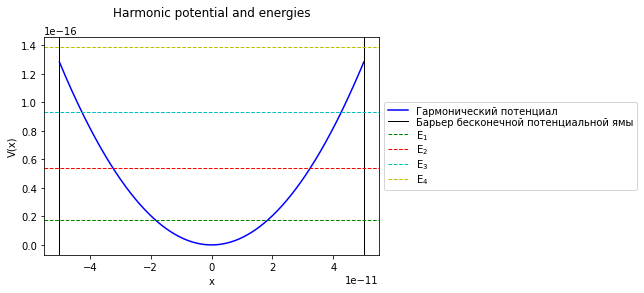

In [32]:
harmonic_pot = [] 

for i in xplotpoints:
    harmonic_pot.append(V(i))

#Ищем энергии для гармонического потенциала
energy1_har = energy_gen(xpoints, 1.0, g1har, g2har)
energy2_har = energy_gen(xpoints, 2.0, g1har, g2har)
energy3_har = energy_gen(xpoints, 3.0, g1har, g2har)
energy4_har = energy_gen(xpoints, 4.0, g1har, g2har)

plt.plot(xplotpoints, harmonic_pot, 'b', label= "Гармонический потенциал")
plt.axvline(x=-a,c='k',ls='-',lw=1.0) #построим вертикальные черные линии, чтобы хорошо представить бесконечный квадрат
plt.axvline(x=a,c='k',ls='-',lw=1.0, label='Барьер бесконечной потенциальной ямы')

plt.axhline(y=energy1_har, c="g",ls="--", lw=1.0, label="E$_1$")
plt.axhline(y=energy2_har, c="r",ls="--", lw=1.0, label="E$_2$")
plt.axhline(y=energy3_har, c="c",ls="--", lw=1.0, label="E$_3$")
plt.axhline(y=energy4_har, c="y",ls="--", lw=1.0, label="E$_4$")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.1) 
plt.title('Harmonic potential and energies\n')
plt.ylabel('V(x)')
plt.xlabel('x')

### Потенциал квадратной потенциальной ямы с конечными стенками:

На этот раз наша потенциальная функция будет выглядить как:
$$
V(x) = \begin{cases} 0 &  -a/2 < x < +a/2, \\ 
    V_0  & |x| > a/2, \end{cases} 
$$

Ее реализация:

In [33]:
#Потенциальная функция:
def V(x):
    if abs(x) >a/2:
        V_x = Vo 
    else: 
        V_x = 0 
    return V_x

Начальные предположения для нее:

In [34]:
g1fin=0.9e-17 
g2fin=1.1e-17

Построим графики волновых функций в данном (далее конечном) потенциале:

For excited state n=1 : energy= 1.46824158745e-17 Joules taking 7 iterations of the secant method
and in eV is 91.6390954596791
The area under is 1.0
For excited state n=2 : energy= 5.70012080937e-17 Joules taking 7 iterations of the secant method
and in eV is 355.76836907830454
The area under is 1.0
For excited state n=3 : energy= 1.19250036242e-16 Joules taking 7 iterations of the secant method
and in eV is 744.2893286838631
The area under is 1.0
For excited state n=4 : energy= 1.79029026813e-16 Joules taking 6 iterations of the secant method
and in eV is 1117.3949994583504
The area under is 1.0


Text(0.5, 1.0, 'Normalised wavefunction in square potential\n')

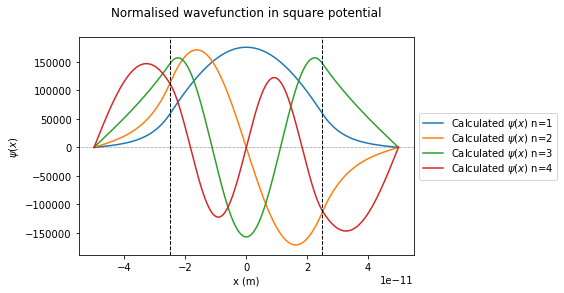

In [35]:
normwf_fin=higherstate_wf(xpoints,xplotpoints,4.0, g1fin, g2fin)
plt.axvline(x=-a/2,c='k',ls='--',lw=1.0) 
plt.axvline(x=a/2,c='k',ls='--',lw=1.0)
plt.title('Normalised wavefunction in square potential\n')

Построим графики плотностей в конечном потенциале

For excited state n=1 : energy= 1.46824158745e-17 Joules taking 7 iterations of the secant method
Area of integral of state n= 1 is: 0.9999999999999992
For excited state n=2 : energy= 5.70012080937e-17 Joules taking 7 iterations of the secant method
Area of integral of state n= 2 is: 0.9999999999999997
For excited state n=3 : energy= 1.19250036242e-16 Joules taking 7 iterations of the secant method
Area of integral of state n= 3 is: 0.9999999999999994
For excited state n=4 : energy= 1.79029026813e-16 Joules taking 6 iterations of the secant method
Area of integral of state n= 4 is: 1.0000000000000002


Text(0.5, 1.0, 'Normalised probability density in square potential\n')

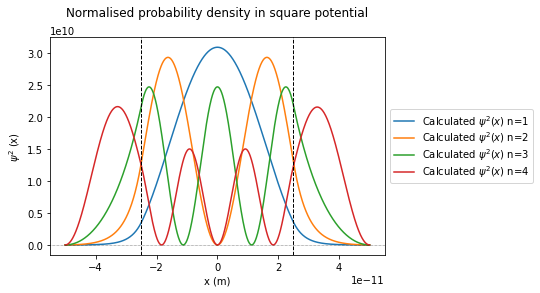

In [36]:

normprob_fin=higherstate_prob(xpoints,xplotpoints,4.0, g1fin, g2fin)
plt.axvline(x=-a/2,c='k',ls='--',lw=1.0)
plt.axvline(x=a/2,c='k',ls='--',lw=1.0) 
plt.title('Normalised probability density in square potential\n')

Полученные выше графики для волновых функций и функций плотности вероятности для конечной потенциальной ямы согласуются с теорией решений уравнения Шредингера с конечным потенциалом прямоугольной ямы. Основные совпадающие характеристики заключаются в том, что волновые функции и функции плотности вероятности находятся в колебательном движении внутри ямы (так как решения имеют форму $sin(x) + cos(x)$, тогда как вне конечной прямоугольной ямы наблюдается экспоненциальное затухание волновой функции (волновая функция имеет вид $e^{x}$ на левой стороне ямы и $e^{-x}$ на правой стороне ямы), что свидетельствует о том, что существует конечная вероятность того, что частица может перемещаться через потенциальный барьер и оказаться вне конечной потенциальной ямы. Но также волновые функции встречаются в точке $0$ при $x = +/- a$, что удовлетворяет граничным условиям отсутствия волновой функции вне бесконечной квадратной ямы , поскольку частицы, обладающие бесконечной энергией, были бы невозможны. Волновые функции также согласуются с теорией, т.к количество максимумов соответствует n-му возбужденному состоянию, а функции плотности вероятности симметричны относительно центра ямы $(x = 0)$.

Ниже изображена потенциальная функций модели и значения энергий состояний

For excited state n=1.0 : energy= 1.46824158745e-17 Joules taking 7 iterations of the secant method
For excited state n=2.0 : energy= 5.70012080937e-17 Joules taking 7 iterations of the secant method
For excited state n=3.0 : energy= 1.19250036242e-16 Joules taking 7 iterations of the secant method
For excited state n=4.0 : energy= 1.79029026813e-16 Joules taking 6 iterations of the secant method


Text(0.5, 0, 'x')

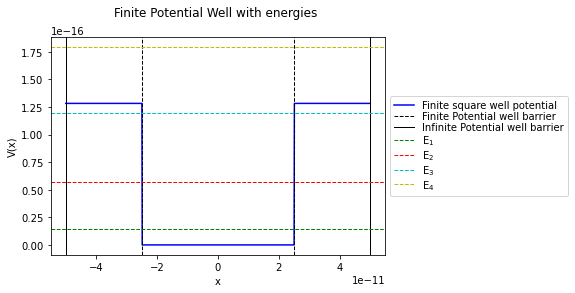

In [37]:
finite_pot = [] 
for i in xplotpoints:
    finite_pot.append(V(i))

#Находим собственные энергетии
energy1_fin = energy_gen(xpoints, 1.0, g1fin, g2fin)
energy2_fin = energy_gen(xpoints, 2.0, g1fin, g2fin)
energy3_fin = energy_gen(xpoints, 3.0, g1fin, g2fin)
energy4_fin = energy_gen(xpoints, 4.0, g1fin, g2fin)

plt.plot(xplotpoints, finite_pot, 'b', label="Finite square well potential")
plt.axvline(x=-a/2,c='k',ls='--',lw=1.0, label='Finite Potential well barrier') 
plt.axvline(x=a/2,c='k',ls='--',lw=1.0)
plt.axvline(x=-a,c='k',ls='-',lw=1.0, label='Infinite Potential well barrier')
plt.axvline(x=a,c='k',ls='-',lw=1.0)

plt.axhline(y=energy1_fin, c="g",ls="--", lw=1.0, label="E$_1$") 
plt.axhline(y=energy2_fin, c="r",ls="--", lw=1.0, label="E$_2$")
plt.axhline(y=energy3_fin, c="c",ls="--", lw=1.0, label="E$_3$")
plt.axhline(y=energy4_fin, c="y",ls="--", lw=1.0, label="E$_4$")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.1) 
plt.title('Finite Potential Well with energies \n')
plt.ylabel('V(x)')
plt.xlabel('x')

### Ангармонический потенциал

Определим потенциал как
$$
V(x) = V_0 \frac{x^4}{a^4}
$$

In [38]:
def V(x):
    return Vo*(x/a)**4 #Ангармонический потенциал 

In [39]:
g1ah=7.0e-18 #Начальные предположения об энергии
g2ah=8.0e-18

For excited state n=1 : energy= 9.8735012488e-18 Joules taking 6 iterations of the secant method
and in eV is 61.62464891276722
The area under is 1.0
For excited state n=2 : energy= 3.59002659186e-17 Joules taking 6 iterations of the secant method
and in eV is 224.06856771066344
The area under is 1.0
For excited state n=3 : energy= 7.25294684576e-17 Joules taking 5 iterations of the secant method
and in eV is 452.686733601293
The area under is 1.0
For excited state n=4 : energy= 1.1833458206e-16 Joules taking 6 iterations of the secant method
and in eV is 738.5755964301549
The area under is 1.0


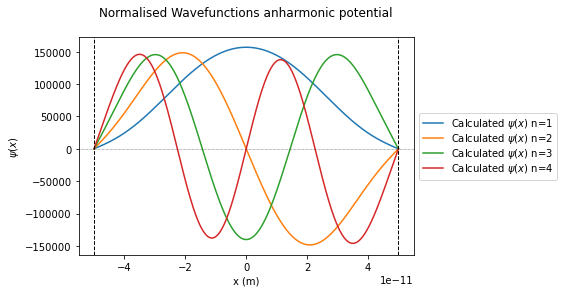

In [40]:
#Находим волновые функции 
normwf_anhar=higherstate_wf(xpoints,xplotpoints,4.0, g1ah, g2ah)
plt.title('Normalised Wavefunctions anharmonic potential\n')
plt.axvline(x=-a,c='k',ls='--',lw=1.0)
plt.axvline(x=a,c='k',ls='--',lw=1.0)

For excited state n=1 : energy= 9.8735012488e-18 Joules taking 6 iterations of the secant method
Area of integral of state n= 1 is: 1.0
For excited state n=2 : energy= 3.59002659186e-17 Joules taking 6 iterations of the secant method
Area of integral of state n= 2 is: 1.000000000000002
For excited state n=3 : energy= 7.25294684576e-17 Joules taking 5 iterations of the secant method
Area of integral of state n= 3 is: 1.0000000000000002
For excited state n=4 : energy= 1.1833458206e-16 Joules taking 6 iterations of the secant method
Area of integral of state n= 4 is: 0.9999999999999996


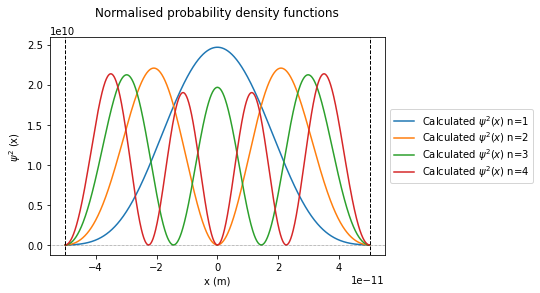

In [41]:
#Находим плотности вероятности
normprob_anhar=higherstate_prob(xpoints,xplotpoints,4.0, g1ah, g2ah)
plt.title('Normalised probability density functions\n')
plt.axvline(x=-a,c='k',ls='--',lw=1.0) 
plt.axvline(x=a,c='k',ls='--',lw=1.0)

Также построим график потенциальной энергии и энергий возбужденных состояний:

For excited state n=1.0 : energy= 9.8735012488e-18 Joules taking 6 iterations of the secant method
For excited state n=2.0 : energy= 3.59002659186e-17 Joules taking 6 iterations of the secant method
For excited state n=3.0 : energy= 7.25294684576e-17 Joules taking 5 iterations of the secant method
For excited state n=4.0 : energy= 1.1833458206e-16 Joules taking 6 iterations of the secant method


Text(0.5, 0, 'x')

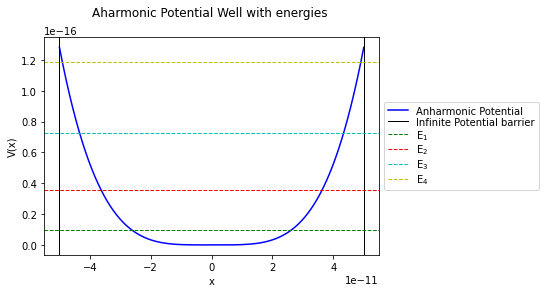

In [42]:
anharmonic_pot = [] 

for i in xplotpoints:
    anharmonic_pot.append(V(i))

#находим энергии
energy1_ah = energy_gen(xpoints, 1.0, g1ah, g2ah)
energy2_ah = energy_gen(xpoints, 2.0, g1ah, g2ah)
energy3_ah = energy_gen(xpoints, 3.0, g1ah, g2ah)
energy4_ah = energy_gen(xpoints, 4.0, g1ah, g2ah)

plt.plot(xplotpoints, anharmonic_pot, 'b', label='Anharmonic Potential')
plt.axvline(x=-a,c='k',ls='-',lw=1.0) 
plt.axvline(x=a,c='k',ls='-',lw=1.0, label='Infinite Potential barrier')
plt.axhline(y=energy1_ah, c="g",ls="--", lw=1.0, label="E$_1$")
plt.axhline(y=energy2_ah, c="r",ls="--", lw=1.0, label="E$_2$")
plt.axhline(y=energy3_ah, c="c",ls="--", lw=1.0, label="E$_3$")
plt.axhline(y=energy4_ah, c="y",ls="--", lw=1.0, label="E$_4$")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labelspacing=0.1) 
plt.title('Aharmonic Potential Well with energies \n')
plt.ylabel('V(x)')
plt.xlabel('x')